In [56]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
repL4L="/Users/gilles/ownCloud/Recherche/Boye/HDR/Data/L4L/IMM21/"
fName="Comparaisons-Swim.txt"
fSource=repL4L+fName

In [3]:
with open(fSource,"r") as inFile:
    lines=[l.strip() for l in inFile.readlines()]

In [4]:
def decodeSwim(nom):
    result=""
    if "paradigmes" in nom:
        result="Syn-"
    else :
        result="Mor-"
    if "00" in nom:
        result+="Head"
    elif "01" in nom:
        result+="All"
    else:
        result+="Tail"
    if "Swim1" in nom:
        result+="1"
    else:
        result+="2"
    if "Stem" in nom:
        result+="S"
    else:
        result+="N"
    return result

def decodeControl(nom):
    result=""
    if "02" in nom:
        result+="Tail"
    elif "vlexique" in nom:
        result+="Flexique"
    return result

In [5]:
comparaisons={}
for i,line in enumerate(lines):
    m=re.search(ur"^(.*) vs (.*)$",line)
    if m:
        control=decodeControl(m.group(2))
        if control not in comparaisons:
            comparaisons[control]={}
        par,swim=decodeSwim(m.group(1)).split("-")
        if par not in comparaisons[control]:
            comparaisons[control][par]={}
        identiques=int(lines[i+1].split(": ")[-1].split(" =>")[0])
        manquantes=int(lines[i+2].split(": ")[-1].split(" =>")[0])
        differentes=int(lines[i+3].split(": ")[-1].split(" =>")[0])
        precision=float(lines[i+4].split(": ")[-1].split("%")[0])
        rappel=float(lines[i+5].split(": ")[-1].split("%")[0])
        comparaisons[control][par][swim]=(identiques,manquantes,differentes,precision,rappel)

In [6]:
comparaisons["Tail"]

{'Mor': {'Head1N': (41127, 3801, 114, 99.7, 91.5),
  'Head1S': (42397, 2513, 132, 99.7, 94.4),
  'Head2N': (43137, 1752, 153, 99.6, 96.1),
  'Head2S': (43608, 1256, 178, 99.6, 97.2)},
 'Syn': {'Head1N': (37820, 7097, 125, 99.7, 84.2),
  'Head1S': (40401, 4493, 148, 99.6, 90.0),
  'Head2N': (41647, 3235, 160, 99.6, 92.8),
  'Head2S': (42514, 2347, 181, 99.6, 94.8)}}

In [7]:
sns.set_style("whitegrid")

# Swim Head — Control Tail

In [8]:
def preparerTailDF(swim):
    control="Tail"
    df=pd.DataFrame(comparaisons[control][swim]).T
    df.columns="identiques manquantes différentes précision rappel".split(" ")
    df.rappel=df.identiques/(df.identiques+df.manquantes)*100
    df["précision"]=df.identiques/(df.identiques+df["différentes"])*100
    return df

In [168]:
dfS=preparerTailDF("Syn")
dfS.index="1N 1S 2N 2S".split(" ")
dfM=preparerTailDF("Mor")
dfM.index="1N 1S 2N 2S".split(" ")
dfMS=pd.concat([dfS,dfM],keys=['Syntactic', 'Morphomic'])

In [169]:
dfMS

identiques  manquantes  différentes  précision     rappel
Syntactic 1N     37820.0      7097.0        125.0  99.670576  84.199746
          1S     40401.0      4493.0        148.0  99.635009  89.991981
          2N     41647.0      3235.0        160.0  99.617289  92.792211
          2S     42514.0      2347.0        181.0  99.576063  94.768284
Morphomic 1N     41127.0      3801.0        114.0  99.723576  91.539797
          1S     42397.0      2513.0        132.0  99.689624  94.404364
          2N     43137.0      1752.0        153.0  99.646570  96.097039
          2S     43608.0      1256.0        178.0  99.593477  97.200428

In [171]:
dfCompTail=dfMS.unstack(level=0)
dfCompTail

identiques           manquantes           différentes            précision  \
    Syntactic Morphomic  Syntactic Morphomic   Syntactic Morphomic  Syntactic   
1N    37820.0   41127.0     7097.0    3801.0       125.0     114.0  99.670576   
1S    40401.0   42397.0     4493.0    2513.0       148.0     132.0  99.635009   
2N    41647.0   43137.0     3235.0    1752.0       160.0     153.0  99.617289   
2S    42514.0   43608.0     2347.0    1256.0       181.0     178.0  99.576063   

                  rappel             
    Morphomic  Syntactic  Morphomic  
1N  99.723576  84.199746  91.539797  
1S  99.689624  89.991981  94.404364  
2N  99.646570  92.792211  96.097039  
2S  99.593477  94.768284  97.200428

### Nombres de formes identiques

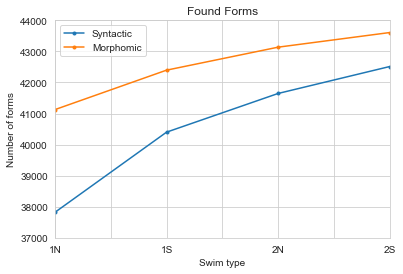

In [188]:
ax=dfCompTail["identiques"].plot(title="Found Forms",legend=True,style=".-")
ax.set_xlabel("Swim type")
ax.set_ylabel("Number of forms")
_=ax.set_ylim(37000,44000)

### Nombres de formes manquantes

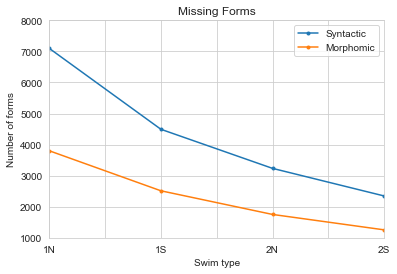

In [187]:
ax=dfCompTail["manquantes"].plot(title="Missing Forms",legend=True,style=".-")
ax.set_xlabel("Swim type")
_=ax.set_ylabel("Number of forms")
_=ax.set_ylim(1000,8000)

### Nombres de formes différentes

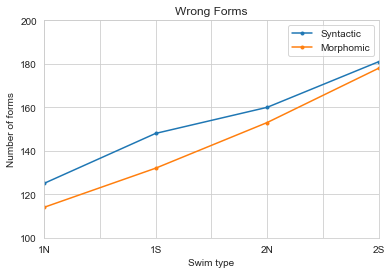

In [186]:
ax=dfCompTail["différentes"].plot(title="Wrong Forms",legend=True,style=".-")
ax.set_xlabel("Swim type")
_=ax.set_ylabel("Number of forms")
_=ax.set_ylim(100,200)

### Précision

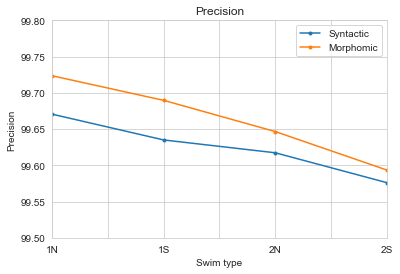

In [189]:
ax=dfCompTail["précision"].plot(title="Precision",legend=True,style=".-")
ax.set_xlabel("Swim type")
_=ax.set_ylabel("Precision")
_=ax.set_ylim(99.5,99.8)

### Rappel

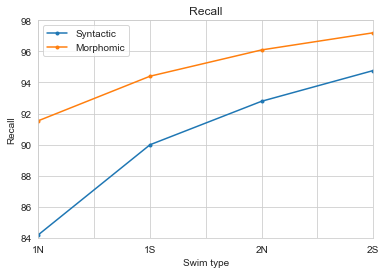

In [191]:
ax=dfCompTail["rappel"].plot(title="Recall",legend=True,style=".-")
ax.set_xlabel("Swim type")
_=ax.set_ylabel("Recall")
_=ax.set_ylim(84,98)

(99.5, 100)

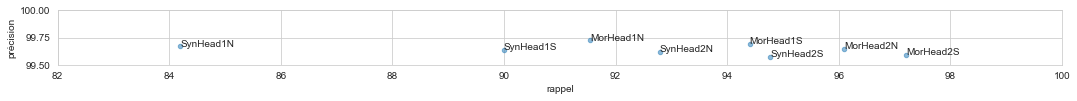

In [18]:
ax=dfMS.plot.scatter(x="rappel",y="précision",alpha=0.5,figsize=(18,1))
_=dfMS[["rappel","précision","index"]].apply(lambda x: ax.text(*x),axis=1)
ax.set_xlim(82,100)
ax.set_ylim(99.5,100)


# Swim Head — Control Flexique

In [192]:
def preparerFlexDF(swim):
    control="Flexique"
    df=pd.DataFrame(comparaisons[control][swim]).T
    df.columns="identiques manquantes différentes précision rappel".split(" ")
    df.rappel=df.identiques/(df.identiques+df.manquantes)*100
    df["précision"]=df.identiques/(df.identiques+df["différentes"])*100
    dfAll=df[df.index.str.contains("All")]
    dfAll.index="1N 1S 2N 2S".split(" ")
    dfHead=df[df.index.str.contains("Head")]
    dfHead.index="1N 1S 2N 2S".split(" ")
    return dfAll,dfHead

In [193]:
dfAllS,dfHeadS=preparerFlexDF("Syn")
dfAllM,dfHeadM=preparerFlexDF("Mor")
dfAll=pd.concat([dfAllS,dfAllM],keys=["Syntactic","Morphomic"])
dfHead=pd.concat([dfHeadS,dfHeadM],keys=["Syntactic","Morphomic"])

In [196]:
dfCompLex=pd.concat([dfHead,dfAll],keys=["Head","All"])#.unstack(level=1).unstack(level=1)
dfCompLex#.index.set_levels("1N 1S 2N 2S 1N 1S 2N 2S".split(" "),level=2)
dfLex=dfCompLex.unstack(level=0).unstack(level=0)

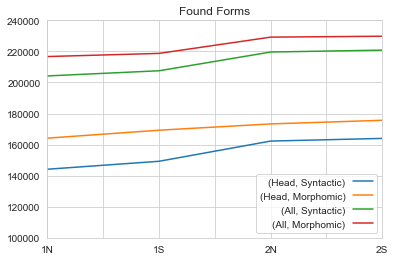

In [197]:
ax=dfLex["identiques"].plot(legend=True)
ax.legend(loc="lower right",markerfirst=False)
_=ax.set_ylim(100000,240000)
_=ax.set_title("Found Forms")

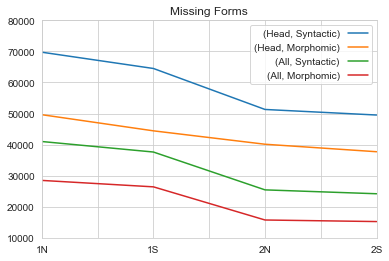

In [198]:
ax=dfLex["manquantes"].plot(legend=True)
ax.legend(loc="upper right",markerfirst=False)
_=ax.set_ylim(10000,80000)
_=ax.set_title("Missing Forms")

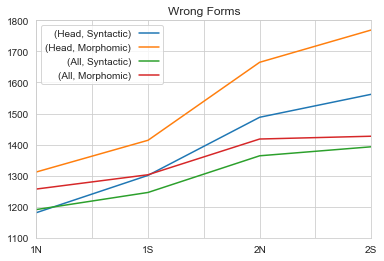

In [199]:
ax=dfLex["différentes"].plot(legend=True)
ax.legend(loc="upper left",markerfirst=False)
_=ax.set_ylim(1100,1800)
_=ax.set_title("Wrong Forms")

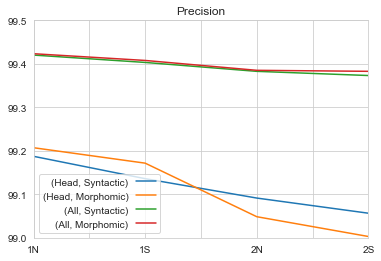

In [200]:
ax=dfLex["précision"].plot(legend=True)
ax.legend(loc="lower left",markerfirst=False)
_=ax.set_ylim(99,99.5)
_=ax.set_title("Precision")

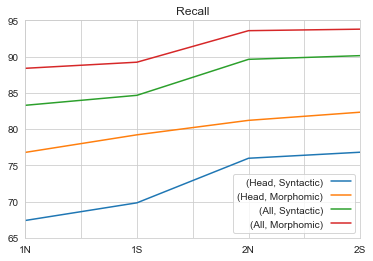

In [201]:
ax=dfLex["rappel"].plot(legend=True)
ax.legend(loc="lower right",markerfirst=False)
_=ax.set_ylim(65,95)
_=ax.set_title("Recall")